<Figure size 1200x800 with 0 Axes>

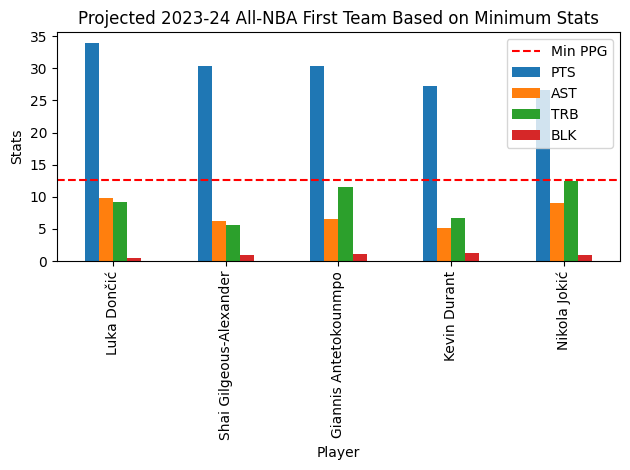

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the historical All-NBA First Team data and current season player stats
first_team_data = pd.read_csv('../data/NBA1stTeamStats.csv')
player_data = pd.read_csv('../data/currSeasonStatsNBA.csv')

# Calculate the minimum stats for the All-NBA First Team
min_stats = first_team_data[['FG%', 'PPG', 'APG', 'RPG', 'BLKPG']].min()

# Filter players who meet or exceed the minimum stats
qualified_players = player_data[
    (player_data['FG%'] >= min_stats['FG%']) &
    (player_data['PTS'] >= min_stats['PPG']) &
    (player_data['AST'] >= min_stats['APG']) &
    (player_data['TRB'] >= min_stats['RPG']) &
    (player_data['BLK'] >= min_stats['BLKPG'])
]

# Separate players by position and get the top performers
top_guards = qualified_players[qualified_players['Pos'].isin(['PG', 'SG', 'G'])].nlargest(2, 'PTS')
top_forwards = qualified_players[qualified_players['Pos'].isin(['SF', 'PF', 'F'])].nlargest(2, 'PTS')
top_center = qualified_players[qualified_players['Pos'] == 'C'].nlargest(1, 'PTS')

# Combine the selected players into one DataFrame for the All-NBA First Team
all_nba_first_team = pd.concat([top_guards, top_forwards, top_center])

# Plotting the selected players
plt.figure(figsize=(12, 8))
all_nba_first_team.set_index('Player')[['PTS', 'AST', 'TRB', 'BLK']].plot(kind='bar')
plt.title('Projected 2023-24 All-NBA First Team Based on Minimum Stats')
plt.ylabel('Stats')
plt.axhline(y=min_stats['PPG'], color='r', linestyle='--', label='Min PPG')
plt.legend()

plt.tight_layout()
plt.show()
